 <h1><center>Création d'un prédicteur permettant <br/> de déterminer, pour un individu donné, la ville <br/> qui lui correspond le mieux.</center></h1>



Leon Bousquet -
Tanguy CADIEUX -
INFRES 12


# Mise en place du Dataset


Nous souhaitons mettre en place un système qui puisse associer un individu défini par un certain nombre de caractéristiques à une ville en France répondant aux critères de l'individu. 

Afin de recueillir nos données, nous avons décidé de créer un formulaire que nous addresserons à un maximum de personnes afin d'obtenir un jeu de données pertinent. Ce formulaire a pour but d'évaluer sur une échelle de 1 à 10 l'impact que chaque critère a sur l'individu interrogé. Ainsi, nous obtenons des données chiffrées que nous pourrons exploiter lors de la phase d'apprentissage. 

## Critères 

Nous avons donc sélectionné des critères caractérisants une ville en termes de qualité de vie. 

Voici les critères que nous allons utiliser pour caractériser nos individus afin d'obtenir un jeu de données de test :

*   Environnement: Une ville investie dans l'écologie et le respect de l'environnement, propre, non polluée.

*   Vie sociale: Présence d'évènements sociaux, lieux de regroupement, accès au sport.

*   Accès à la culture: Présence de lieux culturels (musées, thétares, cinémas) et organisation d'évènements culturels tels que des expositions.

*   Sécurité: Se sentir en sécurité, peu de délinquance et d'incivilités.

*   Facilité de transport: Facile d'accès, facile de se déplacer à l'intérieur, transports en commun, voies cyclables et piétonnes.

*   Vie de famille: Une ville pour élever des enfants sereinement, présence de crèches, collèges, lycées.

*   Coût de la vie: Le coût de la vie ne doit pas être trop élevé, faire des courses, trouver un logement n'est pas excessif.

*   Proche de la mer

*   Proche de la Montagne

Ainsi nous obtenons un ensemble d'individus caractérisés par des vecteurs contenant autant de valeurs entre 1 et 10 que de critères évalués. Ce sont nos vecteurs "x" de données. 



## Cible

Pour associer un individu et son ensemble de caractéristiques avec une ville, et pour éviter de devoir créer un jeu de données avec tous nos critères pour chaque ville, nous demandons dans le formulaire d'évaluer, pour une sélection de villes, l'attirance de l'interrogé entre 1 et 5 par ville.


Ainsi nous constituons les vecteurs colonne "y" contenant les résultats attendus pour chaque vecteur "x" d'individu, nous utilisons l'évaluation entre 1 et 5 attribuée par l'utilisateur aux villes citées dans le questionnaire.

Depuis ces notes, nous pouvons établir un classement des villes.
Nous cherchons à prédire la ville idéale, nous ne nous intéressons donc qu'à une seule sortie dans ce cas. Ainsi nous ne séléctionnons que la première ville (celle obtenant la plus haute note) comme valeur cible. 


Nous comptons sur la cohérence des évaluations données aux villes par les interrogés compte tenu des évaluations qu'ils auront donné aux critères cités précédemment. Nous avons donc un jeu de données associant à chaque fois un vecteur de critères à un vecteur de données attendues pour ces critères. Cela va nous permettre d'entraîner notre modèle. 






# Manipulation du dataset




## Importation et preprocessing du Dataset

Nous exportons le dataset obtenu depuis le sondage en format csv. Ce fichier sera hébergé sur Github. Nous importons ensuite ce fichier hébergé depuis son url.

Nous enregistrons les caractéristiques dans la variable "X", puis la cible dans "Y".
Nous définissons également la variable "première ville" comme étant une variable catégorielle, pour l'adapter au contexte de classification multi-classes.

Une fois les données correctement mises en forme, nous appellons la méthode train_test_split pour séparer les données en un set d'entrainement et de test. Cela nous permettra d'entrainer les données à travers différents modèles.



Text(0.5, 1.0, 'Répartition des villes préférées')

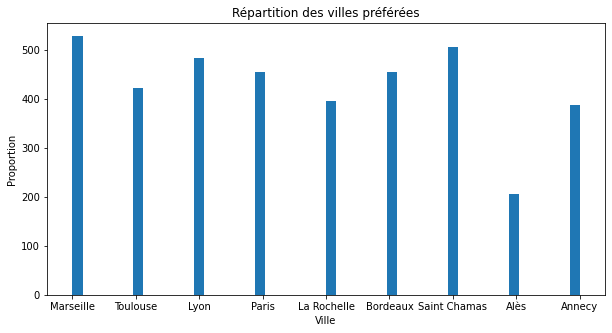

In [2]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
import pandas as pd  
import matplotlib.pyplot as plt



# Utiliser l'url suivante permet de récupérer les vraies réponses issues du sondage
# url = 'https://raw.githubusercontent.com/Tanjoui/villes_datasets/main/sondage1.csv'

# L'url suivante utilise les résultats du sondage, auquels on ajoute des données 
# entrées à la main pour enrichir le dataset.
# url = 'https://raw.githubusercontent.com/Tanjoui/villes_datasets/main/sondage2.csv'

# Cette url correspond au dataset enrichi avec encore plus de données (200 lignes)
# url = 'https://raw.githubusercontent.com/Tanjoui/villes_datasets/main/sondage3.csv'

# Cette url correspond au dataset enrichi avec encore plus de données (1000 lignes)
#url = 'https://raw.githubusercontent.com/Tanjoui/villes_datasets/main/sondage4.csv'


# Cette url correspond au dataset enrichi avec encore plus de données (3800 lignes)
url = 'https://raw.githubusercontent.com/Tanjoui/villes_datasets/main/sondage7.csv'


villes = pd.read_csv(url, sep=',')
# On enregistre le dataset dans un dataframe

# X -> features, y -> label 
X = villes[["Environnement", "Vie sociale", "Accès à la culture", "Sécurité", 
            "Facilité de transport", "Accès à l'emploi", "Vie de famille", 
            "Coût de la vie", "Mer", "Montagne"]]

# on définit y comme une variable catégorielle 
villes['Première ville'] = pd.Categorical(villes['Première ville'])


y = villes["Première ville"]


# On divise en set d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
 



# Afficher la répartition des villes préférées
plt.figure(figsize=(10, 5))
plt.hist(villes['Première ville'], density=False, bins=50)
plt.xlabel('Ville')
plt.ylabel('Proportion')
plt.title("Répartition des villes préférées")



## Analyse du dataset

Nous effectuons une visualisation de nos données pour mieux comprendre nos données dans un premier temps.

On observe une cohérence dans les résultats obtenus. Une ville comme Paris, Lyon ou Marseille sera plus prisée lorsque l'utilisateur s'intéresse à l'accès à l'emploi par exemple.

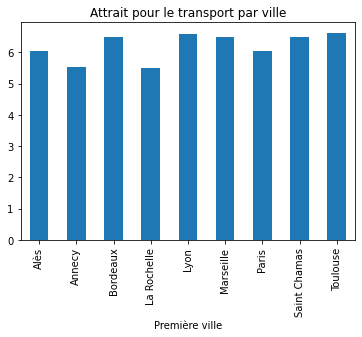

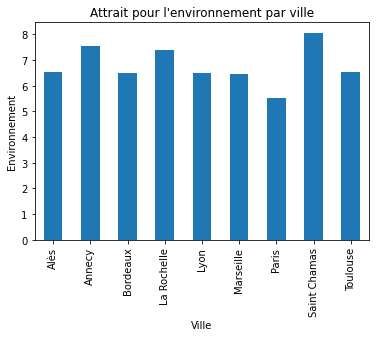

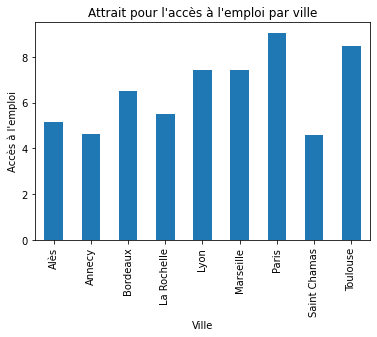

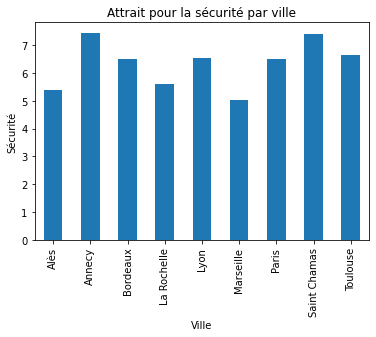

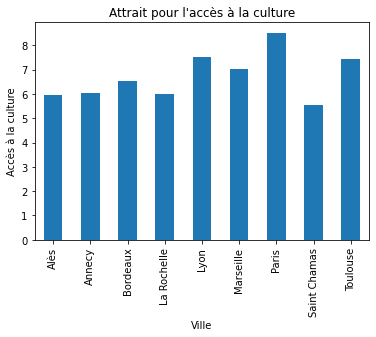

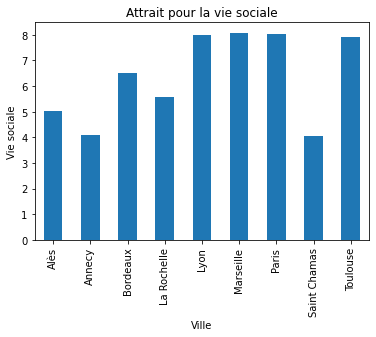

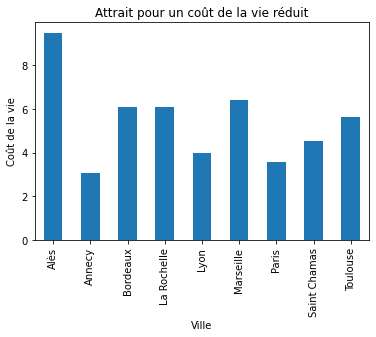

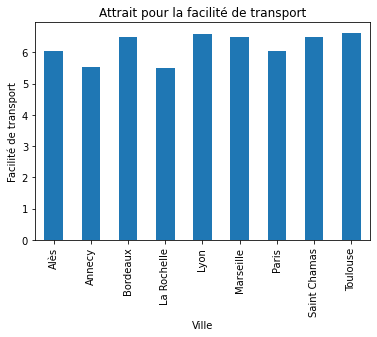

In [3]:

plt.figure()
villesge = villes.groupby('Première ville')['Facilité de transport']
villesae = villesge.aggregate(lambda x: x.mean()) # permet de regrouper selon la moyenne
villesae.plot(kind='bar', sort_columns='False')
plt.title('Attrait pour le transport par ville')
plt.show()


plt.figure()
villes.groupby('Première ville')['Environnement'].aggregate(lambda x: x.mean()).plot(kind='bar')
plt.xlabel('Ville')
plt.ylabel('Environnement')
plt.title('Attrait pour l\'environnement par ville')
plt.show()


plt.figure()
villes.groupby('Première ville')['Accès à l\'emploi'].aggregate(lambda x: x.mean()).plot(kind='bar')
plt.xlabel('Ville')
plt.ylabel('Accès à l\'emploi')
plt.title('Attrait pour l\'accès à l\'emploi par ville')
plt.show()

plt.figure()
villes.groupby('Première ville')['Sécurité'].aggregate(lambda x: x.mean()).plot(kind='bar')
plt.xlabel('Ville')
plt.ylabel('Sécurité')
plt.title('Attrait pour la sécurité par ville')
plt.show()

plt.figure()
villes.groupby('Première ville')['Accès à la culture'].aggregate(lambda x: x.mean()).plot(kind='bar')
plt.xlabel('Ville')
plt.ylabel('Accès à la culture')
plt.title('Attrait pour l\'accès à la culture')
plt.show()

plt.figure()
villes.groupby('Première ville')['Vie sociale'].aggregate(lambda x: x.mean()).plot(kind='bar')
plt.xlabel('Ville')
plt.ylabel('Vie sociale')
plt.title('Attrait pour la vie sociale')
plt.show()


plt.figure()
villes.groupby('Première ville')['Coût de la vie'].aggregate(lambda x: x.mean()).plot(kind='bar')
plt.xlabel('Ville')
plt.ylabel('Coût de la vie')
plt.title('Attrait pour un coût de la vie réduit')
plt.show()

plt.figure()
villes.groupby('Première ville')['Facilité de transport'].aggregate(lambda x: x.mean()).plot(kind='bar')
plt.xlabel('Ville')
plt.ylabel('Facilité de transport')
plt.title('Attrait pour la facilité de transport')
plt.show()






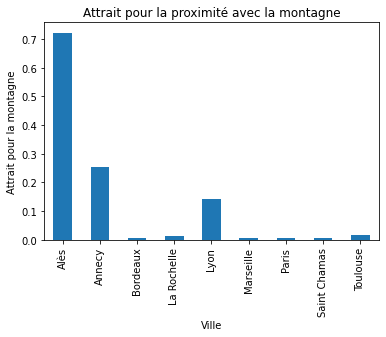

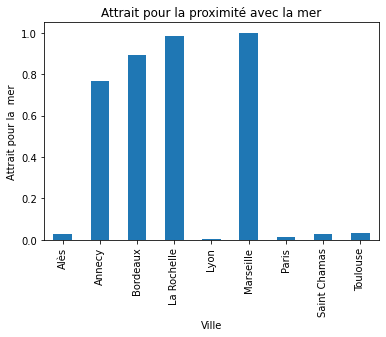

In [4]:

plt.figure()
villes.groupby('Première ville')['Montagne'].aggregate(lambda x: x.mean()).plot(kind='bar')
plt.xlabel('Ville')
plt.ylabel('Attrait pour la montagne')
plt.title('Attrait pour la proximité avec la montagne')
plt.show()

plt.figure()
villes.groupby('Première ville')['Mer'].aggregate(lambda x: x.mean()).plot(kind='bar')
plt.xlabel('Ville')
plt.ylabel('Attrait pour la  mer')
plt.title('Attrait pour la proximité avec la mer')
plt.show()

# Evaluation des Modèles

Nous devons donc déterminer quelle ville, parmis un ensemble défini, correspondra le mieux à un utilisateur.
Nous faisons face à un problème de type classification, car nous devons prédire y parmis un ensemble de villes défini, on dit que y est catégoriel.

Il faut noter qu'il s'agit d'une classification multi-classes, car nous souhaitons placer l'utilisateur sur la ville idéale parmi un ensemble de plusieurs villes.


## Decision Tree Classifier

L'arbre essaie de déduire une séparation de données d'entraînement d'après les valeurs des caractéristiques afin d'obtenir une bonne généralisation. L'algorithme peut gérer les problèmes de classification binaire et multiclasse. il est ainsi possible d'utiliser ce classifieur pour répondre à notre problématique.

              precision    recall  f1-score   support

        Alès       0.00      0.00      0.00        45
      Annecy       0.70      0.78      0.74        92
    Bordeaux       0.00      0.00      0.00       115
 La Rochelle       0.00      0.00      0.00       116
        Lyon       0.00      0.00      0.00       122
   Marseille       0.41      1.00      0.58       135
       Paris       0.34      0.98      0.51       119
Saint Chamas       0.55      0.99      0.70       103
    Toulouse       0.00      0.00      0.00       114

    accuracy                           0.44       961
   macro avg       0.22      0.42      0.28       961
weighted avg       0.23      0.44      0.29       961



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


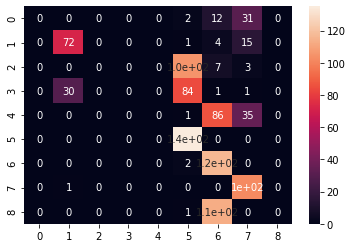

In [5]:
from sklearn.metrics import classification_report
import seaborn as sns

# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 


# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 
print(classification_report(y_test, dtree_predictions ))
sns.heatmap(cm, annot=True)


Nous obtenons une précision correcte sur certaines villes telles que Marseille, cependant nous constatons que l'utilisation de ce classifeur n'est pas adaptée à notre problématique.

## SVM

SVM (Support vector machine) est une méthode de classification efficace quand le vecteur de caractéristiques est de grande dimension. 
Ce modèle supporte seulement la classification binaire dans sa forme basique mais il existe des extensions permettant de gérer de la classification multiclasse. 



0.7658688865764828
              precision    recall  f1-score   support

        Alès       0.90      0.98      0.94        45
      Annecy       0.93      0.88      0.91        92
    Bordeaux       0.66      0.74      0.70       115
 La Rochelle       0.77      0.76      0.76       116
        Lyon       0.71      0.63      0.67       122
   Marseille       0.90      0.82      0.86       135
       Paris       0.79      0.82      0.81       119
Saint Chamas       0.96      0.95      0.96       103
    Toulouse       0.69      0.75      0.71       114

    accuracy                           0.80       961
   macro avg       0.81      0.81      0.81       961
weighted avg       0.80      0.80      0.80       961

0.7981269510926119


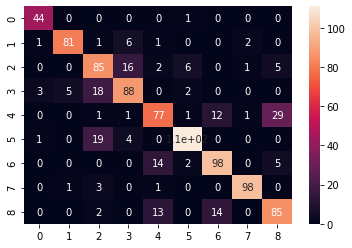

In [6]:
from sklearn.svm import SVC

svm_model_linear = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 

clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
print(clf.score(X_test, y_test))

# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  


# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 

print(classification_report(y_test, svm_predictions ))

print(accuracy)
sns.heatmap(cm, annot=True)

## K-Neighbors Classifier

Ce modèle est utilisé autant en classification qu’en régression. Il s’agit de classer une entrée dans la catégorie à laquelle appartient les k plus proches voisins dans l’espace des caractéristiques identifiées par apprentissage. 

              precision    recall  f1-score   support

        Alès       0.74      0.96      0.83        45
      Annecy       0.84      0.91      0.87        92
    Bordeaux       0.53      0.76      0.63       115
 La Rochelle       0.79      0.62      0.70       116
        Lyon       0.55      0.56      0.55       122
   Marseille       0.94      0.56      0.70       135
       Paris       0.73      0.78      0.76       119
Saint Chamas       0.87      0.83      0.85       103
    Toulouse       0.60      0.62      0.61       114

    accuracy                           0.71       961
   macro avg       0.73      0.73      0.72       961
weighted avg       0.73      0.71      0.71       961

0.7065556711758585


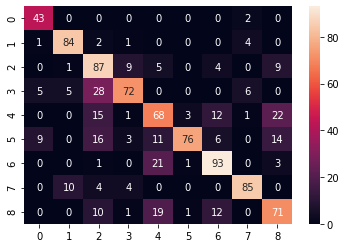

In [7]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

print(classification_report(y_test, knn_predictions ))
print(accuracy)
sns.heatmap(cm, annot=True)

## Naive bayes classifier


Ce modèle de classification est basé sur le théorème de Bayes et a pour principe que l’effet d’une caractéristique dans une classe est indépendant des autres caractéristiques. Le modèle Naive Bayes possède un important taux d’exactitude et une grande vitesse d’exécution sur de grands jeux de données. 


La condition s'utilisation est qu'il présuppose l'indépendance des caractéristiques entre elles.

Nous pouvons évaluer si les variables sont indépendantes ou non en regardant si il existe des corrélations entre ces données.


In [8]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,Environnement,Vie sociale,Accès à la culture,Sécurité,Facilité de transport,Accès à l'emploi,Vie de famille,Coût de la vie,Mer,Montagne
Environnement,1.000000,-0.343897,-0.238281,0.108659,-0.001700,-0.314474,0.290293,-0.029027,0.074852,0.018368
Vie sociale,-0.343897,1.000000,0.332950,-0.172414,0.137958,0.538589,-0.374190,0.037587,-0.063447,-0.136412
Accès à la culture,-0.238281,0.332950,1.000000,-0.033044,0.072744,0.354867,-0.226751,-0.089800,-0.148342,-0.066011
Sécurité,0.108659,-0.172414,-0.033044,1.000000,0.020192,-0.091493,0.170467,-0.194655,-0.188874,-0.014321
Facilité de transport,-0.001700,0.137958,0.072744,0.020192,1.000000,0.119517,-0.042389,0.036149,-0.092141,-0.053886
Accès à l'emploi,-0.314474,0.538589,0.354867,-0.091493,0.119517,1.000000,-0.307508,-0.040123,-0.176113,-0.149444
Vie de famille,0.290293,-0.374190,-0.226751,0.170467,-0.042389,-0.307508,1.000000,-0.074865,0.094247,-0.027170
Coût de la vie,-0.029027,0.037587,-0.089800,-0.194655,0.036149,-0.040123,-0.074865,1.000000,0.171911,0.158881
Mer,0.074852,-0.063447,-0.148342,-0.188874,-0.092141,-0.176113,0.094247,0.171911,1.000000,-0.217527
Montagne,0.018368,-0.136412,-0.066011,-0.014321,-0.053886,-0.149444,-0.027170,0.158881,-0.217527,1.000000


Nous observons des correlations positives entre l'accès à l'emploi et la vie sociale: les villes les plus actives sont plus vivantes, et moins propices à la vie de famille, et mettent moins l'accent sur l'environnement.

Au delà de ces corrélations nous pouvons supposer que les variables sont indépendantes. Nous pouvons donc essayer d'utiliser le classifieur de Bayes.

Il peut être pertinent d'appliquer le classifeur catégoriel, car cela correspond à la problématique à laquelle nous répondons.

Bayes Classifier: Categoriel
0.8813735691987513
              precision    recall  f1-score   support

        Alès       0.92      0.98      0.95        45
      Annecy       0.99      0.95      0.97        92
    Bordeaux       0.79      0.92      0.85       115
 La Rochelle       0.95      0.78      0.86       116
        Lyon       0.94      0.62      0.75       122
   Marseille       0.96      0.93      0.94       135
       Paris       0.87      0.95      0.91       119
Saint Chamas       0.96      1.00      0.98       103
    Toulouse       0.69      0.89      0.78       114

    accuracy                           0.88       961
   macro avg       0.90      0.89      0.89       961
weighted avg       0.89      0.88      0.88       961



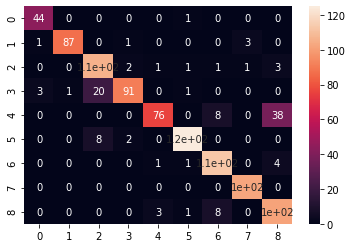

In [9]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import CategoricalNB

cnb = CategoricalNB().fit(X_train, y_train) 
cnb_predictions = cnb.predict(X_test) 

# accuracy on X_test 
accuracy_categorical = cnb.score(X_test, y_test) 
 
# creating a confusion matrix 
cm_categorical = confusion_matrix(y_test, cnb_predictions) 

print("Bayes Classifier: Categoriel")
print(accuracy_categorical)
sns.heatmap(cm_categorical, annot=True)
print(classification_report(y_test, cnb_predictions ))

## Validation croisée

In [19]:
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import numpy as np

Valid_croisee = RepeatedKFold(n_splits=10, n_repeats=10)

cnb = CategoricalNB().fit(X_train, y_train) 

scores = cross_val_score(cnb, X_train, y_train, cv = Valid_croisee)
print('Accuracy cross val: %.3f %%' % (scores.mean()*100.0))


Accuracy cross val: 88.660 %


Nous essayons d'utiliser la validation croisée sur notre modèle le plus performant, le classifieur de Bayes catégoriel. Cela nous permet d'évaluer les performances de notre modèle. sans avoir besoin de séparer le modèle en un echantillon d'entrainement et un de test.

Ici, nous partitionnons notre échantillon train, en 10 échantillons, 9 d'entre eux serviront pour l'apprentissage tandis qu'un sera utile pour la validation. Puis répéter cette opération 10 fois en échangeant à chaque fois les échantillons de validation et d'apprentissage.

L'utilisation de la validation croisée permet d'estimer l'accuracy du modèle. Si celle-ci est répétée l'accuracy sera alors une accuracy moyenne et sera donc plus précise. Pour des petits dataset, elle peut nous permettre d'estimer l'erreur sans avoir d'échantillon test.


L'uilisation de la validation croisée serait également particulièrement utile sur un petit dataset, tel que les résultats initiaux du sondage.


## Amélioration du KNN par validation croisée

On peut également utiliser la validation croisée pour trouver les meilleurs paramètres à utiliser.
Précédemment, nous utilisions 7 voisins dans notre modèle à k-voisins. 
Ainsi la performance optimale déterminée est à 9 voisins.
Cela nous permet d'améliorer nos performances sur ce modèle. Nous garderons cependant le classifieur de Bayes qui donne de meilleurs résultats.

{'n_neighbors': 9}
              precision    recall  f1-score   support

        Alès       0.76      1.00      0.87        45
      Annecy       0.84      0.90      0.87        92
    Bordeaux       0.52      0.76      0.62       115
 La Rochelle       0.77      0.61      0.68       116
        Lyon       0.57      0.56      0.56       122
   Marseille       0.96      0.53      0.69       135
       Paris       0.71      0.82      0.76       119
Saint Chamas       0.89      0.83      0.86       103
    Toulouse       0.55      0.58      0.56       114

    accuracy                           0.70       961
   macro avg       0.73      0.73      0.72       961
weighted avg       0.73      0.70      0.70       961

0.7013527575442248


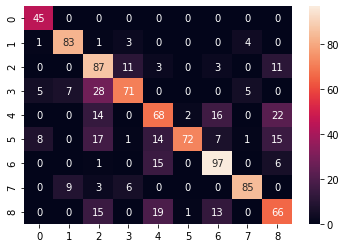

In [26]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':range(1,10)}
knn = GridSearchCV(KNeighborsClassifier(),parameters,cv=Valid_croisee, n_jobs=-1)
knn = knn.fit(X_train, y_train)

print(knn.best_params_)

knn = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

print(classification_report(y_test, knn_predictions ))
print(accuracy)
sns.heatmap(cm, annot=True)

# Critique des résultats obtenus

## Pertinence du dataset

Nous avons composé notre dataset nous mêmes, par conséquent il est important d'évaluer la pertinence du dataset. On dénote ainsi des points d'amélioration, qui nous permettraient d'améliorer nos résultats en modifiant notre dataset.

### Données issues du sondage

Le sondage se base sur les notes des utilisateurs, cela suppose leur bonne foi, et leur **rationnalité**.
Or un utilisateur peut très bien entrer des critères contradictoires à la ville préférée à la fin, cela fausse l'estimation.

L'utilisateur serait tenté de mettre tous les critères au maximum, ce qui nous empècherait de tirer des conclusions.
Pour empècher cela, il aurait été bienvenu de préferer un **classement des critères par ordre d'importance**, plutôt qu'une simple attribution de note.

### Données issues de l'ajout automatique

Pour enrichir notre dataset, nous avions besoin de plus de données, nous avons donc du simuler de nouvelles données.

Pour cela nous avons ajouté aux données du sondage **des valeurs entrées automatiquement**, en attribuant une valeur aléatoire, dont les bornes sont choisies arbitrairement à chaque ville.
Par exemple nous attribuons un entier entre 8 et 10 pour le critère de l'accès à l'emploi pour une ville telle que Paris. 

Cependant les données sont renseignées sur des critères arbitraires que nous avons choisi de façon rationnelle. Les informations que l'on obtient via le formulaire peuvent, à l'inverse, ne pas toujours être rationnelle. 

## Résultats issus de l'apprentissage automatisé

Certaines villes sont **difficiles à différencier**, en effet, peu de critères différencient une ville telle que Toulouse ou Bordeaux.
Les villes en sortie sont majoritairement des grandes villes, ainsi les critères de vie sociale, accès à la culture ou encore facilité de transport peuvent ne pas suffire pour cibler une ville en particulier. 

### Bons résultats sur les villes se démarquant

Une ville telle que Alès aura tendance à **fortement se démarquer**, avec un coût de la vie réduit et l'attrait pour les montagnes.
Saint-Chamas obtient de bons scores également, il s'agit d'un petit village qui se démarque en plusieurs points, on y préferera une faible vie sociale, au profit de la vie de famille et de la sécurité.
Ces deux villes possèdent de bons scores de prédictions.


### Limites sur les grandes villes
D'autre part, les grandes villes sont très difficiles à prédire, car elles **possèdent de nombreuses similtudes** et ne se démarquent que très peu entre elles:
Si Marseille se différencie des grandes villes par la prévalence de l'accès avec la mer, il est très difficile d'effectuer une prédiction entre La Rochelle et Bordeaux d'après nos critères actuels.

Nous observons ainsi les limites de l'apprentissage supervisé, lorsque les données en entrée sont trop similaires, il sera plus dur d'effectuer une prédiction correcte.



# Conclusion

## Application de l'apprentissage supervisé

L'usage de l'apprentissage supervisé est une approche correcte pour ce type de problème, nous disposons de **données labellisées** facilement exploitables. Notre volume de données est cependant **réduit**, mais suffit à obtenir certaines estimations lorsque les villes se différentient. Nous avons obsérvé une amélioration élevée des performances de nos modèles, qui plaffonaient à 50% de précision pour un dataset de 300 valeurs, puis passe à 88% pour 3800 valeurs. Nous constatons ainsi l'importance d'un dataset fourni pour l'application de l'apprentissage supervisé.

L'application de l'apprentissage supervisé serait d'autant plus efficace en adaptant mieux notre dataset à cette problématique. Ainsi, pour pallier ces limites, nous pouvons noter des points d'amélioration.


## Points d'amélioration


* Ajout d'autres caractéristiques pour différencier les villes: cela permettrait de différencier deux villes similaires sur un nouveau critère. De nombreux nouveaux critères pertinents sont envisageables tels que la 

* Utilisation d'un classement plutôt qu'une note dans le sondage: Cela limiterait les fausses estimations dans les sondages 

* Un dataset plus fourni: Nous avons obsérvé une amélioration considérable en fonction du nombre de données utilisées. 

## Conclusion sur la problématique

Nous sommes capables de déterminer une ville idéale pour un utilisateur  founissant des caractéristiques dans 88% des cas, dès lors qu'assez d'utilisateurs répondent au sondage.
Nous pourrions trouver des champs d'application de cette méthode à l'avenir, pour promouvoir au mieux des villes par exemple.

